In [54]:
## packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import cufflinks as cf
from ipywidgets import interact

In [2]:
raw_data = pd.read_csv('/Users/rahuldhakecha/coursesfall2017/goodreads/files/top_2000_user_perspective/unscrape_books/users_2000_book_details.csv', dtype={'rating':np.float64})
# remove all entries which have no genre mentioned, this essentially removes all other NaNs also. In total, we have 199 rows removed
raw_data=raw_data[-raw_data['genre'].isnull()]
## split different genres into different columsn
def get_genre(x, n):
    try:
        return x.split(';')[n-1].lstrip()
    except (AttributeError,TypeError,IndexError):
        return x.split(';')[0].lstrip()
raw_data['genre1']=raw_data['genre'].apply(get_genre,args=[1])
raw_data['genre2']=raw_data['genre'].apply(get_genre,args=[2])
raw_data['genre3']=raw_data['genre'].apply(get_genre,args=[3])
raw_data['genre4']=raw_data['genre'].apply(get_genre,args=[4])
raw_data['genre5']=raw_data['genre'].apply(get_genre,args=[5])
raw_data['genre6']=raw_data['genre'].apply(get_genre,args=[6])

/Users/rahuldhakecha/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
# pd.options.display.max_rows = 4000
old_new_genres=pd.read_csv('/Users/rahuldhakecha/coursesfall2017/goodreads/files/top_2000_user_perspective/unique_genres_reduced_set_JE.csv')
old_new_genres=old_new_genres.drop_duplicates()
#replace with new genre categorizatoion
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre1')
# del raw_data['genre1']
raw_data=raw_data.rename(columns={'New_genre':'New_genre1'})
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre2')
# del raw_data['genre2']
raw_data=raw_data.rename(columns={'New_genre':'New_genre2'})
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre3')
# del raw_data['genre3']
raw_data=raw_data.rename(columns={'New_genre':'New_genre3'})
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre4')
# del raw_data['genre4']
raw_data=raw_data.rename(columns={'New_genre':'New_genre4'})
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre5')
# del raw_data['genre5']
raw_data=raw_data.rename(columns={'New_genre':'New_genre5'})
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre6')
# del raw_data['genre6']
raw_data=raw_data.rename(columns={'New_genre':'New_genre6'})

In [4]:
#Fiction doesn't carry much information; therefore we remove it and replace it with next different categorization
def replace_fiction(x):
    try:
        i=0
        while x[i]=='Fiction':
            i+=1
        return x[i]
    except IndexError:
        return x[0]
data_wo_fiction=raw_data
data_wo_fiction['New_genre']=raw_data[['New_genre1','New_genre2','New_genre3','New_genre4','New_genre5','New_genre6']].apply(replace_fiction,axis=1)

In [5]:
## for our initial analysis we focus on user_id, book_id and New_genre
# our data is categorical and therefore we begin with categorical analysis. 
pre_data=data_wo_fiction[['user_id','book_id','New_genre']]
pre_data = pre_data[pre_data['New_genre']!='Fiction']
unique_books=(pre_data[['book_id','New_genre']]).drop_duplicates()
genre_dist=unique_books.groupby('New_genre').agg('count').reset_index().rename(columns={'book_id':'book_count'})
genre_dist['percent_book_count']=(genre_dist['book_count']*100)/sum(genre_dist['book_count'])

In [6]:
# we can find cross table for user and genres
user_genre_cross=pd.crosstab(pre_data['user_id'],pre_data['New_genre'])

In [15]:
#determine primary genre for each user based on the count; if primary genre is Nonfiction, then go to next genre
df1_temp=user_genre_cross.idxmax(axis=1).to_frame().reset_index().rename(columns={0:'Genre'})
df2_temp=user_genre_cross.max(axis=1).to_frame().reset_index().rename(columns={0:'Genre_count'})
user_prim_genre=df1_temp.merge(df2_temp)
def replace_nonfiction(x):
    try:
        if user_genre_cross.loc[x[0]].sort_values(ascending=False).to_frame().reset_index()['New_genre'][0]=='Nonfiction':
            return(user_genre_cross.loc[x[0]].sort_values(ascending=False).to_frame().reset_index()['New_genre'][1])
        else:
            return(x[1])
    except:
        return(x[1])
user_prim_genre['New_genre']=user_prim_genre[['user_id','Genre']].apply(replace_nonfiction,axis=1)
user_genre_dist=user_prim_genre.groupby('New_genre').agg('count').reset_index()
user_prim_genre=user_prim_genre.set_index('user_id')[['New_genre']]

In [18]:
user_cross_prim = user_genre_cross.join(user_prim_genre)

In [99]:
user_cross_prim = user_cross_prim.drop(['Nonfiction'], axis=1)

In [124]:
def find_cond_prob(genre_user, genre_review):
    tot_mat_count=sum(user_cross_prim.drop(['New_genre'],axis=1).sum())
    tot_genre1_corr_count=user_cross_prim[user_cross_prim['New_genre']==genre_user].drop(['New_genre'],axis=1).sum().sum()
    genre_user_prop=sum(user_cross_prim['New_genre']==genre_user)/1681.0
    genre_review_prop=(sum(user_cross_prim[genre_review])*1.0)/tot_mat_count
#     genre1_given_genre2=(((sum(user_cross_prim[user_cross_prim['New_genre']==genre_user][genre_review])*1.0)/user_cross_prim[genre_review].sum())*genre_review_prop)/genre_user_prop
    genre1_given_genre2=
    return genre1_given_genre2
# find_cond_prob('Mystery Crime Detective', 'Literary Fiction')
interact(find_cond_prob, genre_user=list(user_cross_prim['New_genre'].unique()), genre_review=list(user_cross_prim['New_genre'].unique()))

0.21047131762554477

<function __main__.find_cond_prob>

In [125]:
cond_prob=np.zeros((17,17))
i=0
for genre1 in list(user_cross_prim)[:-1]:
    j=0
    for genre2 in list(user_cross_prim)[:-1]:
        cond_prob[i,j]=find_cond_prob(genre1, genre2)
        j+=1
    i+=1
cond_prob
cond_prob_df=pd.DataFrame(cond_prob, index=list(user_cross_prim), columns=list(user_cross_prim))

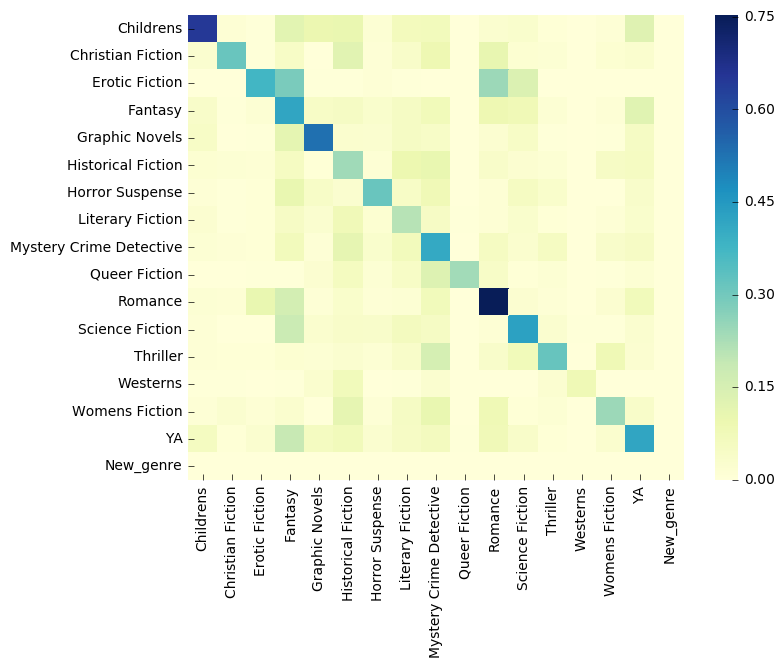

In [126]:
# cond_prob_df
plt.figure(figsize=(8, 6))
sns.heatmap(cond_prob_df, cmap="YlGnBu")
plt.show()

In [118]:
cond_prob_df

,Childrens,Christian Fiction,Erotic Fiction,Fantasy,Graphic Novels,Historical Fiction,Horror Suspense,Literary Fiction,Mystery Crime Detective,Queer Fiction,Romance,Science Fiction,Thriller,Westerns,Womens Fiction,YA,New_genre
Childrens,0.521898,0.011921,0.081898,0.088785,0.071503,0.066881,0.027805,0.030641,0.038225,0.007107,0.020021,0.048633,0.033733,0.000937,0.016290,0.094429,0.0
Christian Fiction,0.031035,0.444085,0.140118,0.050859,0.000810,0.129984,0.029957,0.028402,0.078765,0.000942,0.131721,0.052153,0.131885,0.003975,0.043981,0.033557,0.0
Erotic Fiction,0.000000,0.000000,7.581630,0.264799,0.004078,0.003685,0.020793,0.001709,0.000000,0.000000,0.239570,0.285460,0.009315,0.000000,0.000000,0.000000,0.0
Fantasy,0.040525,0.005399,0.314617,0.385563,0.042048,0.042778,0.075462,0.029062,0.053859,0.007821,0.087698,0.168398,0.104103,0.001324,0.016690,0.117062,0.0
Graphic Novels,0.049805,0.001458,0.074639,0.116939,0.528694,0.024135,0.066964,0.032869,0.032354,0.011190,0.023414,0.100394,0.038271,0.002373,0.011513,0.050569,0.0
Historical Fiction,0.029303,0.027636,0.376204,0.070716,0.008267,0.280375,0.042213,0.077887,0.104341,0.011984,0.056226,0.066846,0.147484,0.003503,0.125025,0.071765,0.0
Horror Suspense,0.015800,0.004604,0.187188,0.130366,0.053871,0.029729,1.004218,0.036923,0.077852,0.015406,0.015898,0.150571,0.296544,0.001083,0.002614,0.046706,0.0
Literary Fiction,0.042653,0.007111,0.247692,0.084664,0.045208,0.120788,0.084781,0.229253,0.065986,0.038282,0.022444,0.125116,0.096825,0.009520,0.032585,0.052239,0.0
Mystery Crime Detective,0.019773,0.012723,0.193189,0.070756,0.011562,0.104008,0.076427,0.043721,0.318796,0.007434,0.058202,0.061420,0.366825,0.005815,0.072438,0.050132,0.0
Queer Fiction,0.000000,0.000000,0.108569,0.004886,0.034062,0.087950,0.062032,0.045890,0.168588,1.788322,0.073215,0.021977,0.166730,0.000000,0.009604,0.024278,0.0


In [128]:
cond_prob_df.sum(axis=0)

Childrens                  0.934303
Christian Fiction          0.428185
Erotic Fiction             0.595619
Fantasy                    1.850651
Graphic Novels             0.932222
Historical Fiction         1.187603
Horror Suspense            0.580388
Literary Fiction           0.900002
Mystery Crime Detective    1.528574
Queer Fiction              0.264426
Romance                    1.616736
Science Fiction            1.034204
Thriller                   0.572688
Westerns                   0.099367
Womens Fiction             0.528831
YA                         1.107238
New_genre                  0.000000
dtype: float64

In [122]:
user_cross_prim['Fantasy'].sum()

87891